# Plotting the spectra from FIRE observation

This is the information regarding the files: 

Yilun made these files (A and B positions are separate) using his reduction routine for Magellan Fire.

Each file is a 6xN array, where each elements are
* Wavelength [A]
* Flux [1e-17 * erg/s/cm2/A]
* Uncertainty [same as flux]
* no-telluric-correction flux [1e-17 * erg/s/cm2/A]
* no-telluric-correction uncertainty [1e-17 * erg/s/cm2/A]
* telluric model


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
plt.rcParams.update({
    "font.size": 20,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "mathtext.fontset": "cm",  # Use Computer Modern (LaTeX-style)
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.linewidth": 1.5,  # Thicker axis lines
    'xtick.major.size': 12,
    'xtick.major.width': 2,
    'ytick.major.size': 12,
    'ytick.major.width': 2,
})


In [12]:

def plot_nir_lines(z=0.0, rest_frame=True, paschen=True, coronal=True,
                   color='dimgray', linestyle='--', alpha=0.8, text_offset=50, fontsize=12, text_color = 'black'):
    """
    Plots vertical lines for NIR emission features: Paschen lines and/or narrow coronal lines. Values in Å.

    Parameters:
    - z (float): Redshift of the object. Used if rest_frame=False.
    - rest_frame (bool): If True, lines are plotted in rest-frame. If False, they are redshifted.
    - paschen (bool): If True, plot Paα, Paβ, Paγ lines.
    - coronal (bool): If True, plot [S III] 9069, 9531, [Si VI] 19641 lines.
    - color, linestyle, alpha: Style for the vertical lines.
    - text_offset (float): Offset (in Å) for placing the text label right of the line.
    - fontsize (int): Font size for the annotations.
    - text_color: Color for the annotation text.
    
    """

    lines = []

    if paschen:
        lines += [
            ('Paα', 18751),
            ('Paβ', 12820),
            ('Paγ', 10940)
        ]
    if coronal:
        lines += [
            ('[S III] 9069', 9069),
            ('[S III] 9531', 9531),
            ('[Si VI]', 19641)
        ]

    ax = plt.gca()

    for label, wl in lines:
        wl_obs = wl * (1 + z) if not rest_frame else wl
        ax.axvline(wl_obs, color=color, linestyle=linestyle, alpha=alpha)
        ax.annotate(label,
                    xy=(wl_obs, ax.get_ylim()[1]),
                    xytext=(wl_obs + text_offset, ax.get_ylim()[1] * 0.95),
                    rotation=90,
                    fontsize=fontsize,
                    color=text_color,
                    va='top')


def boxcar_smooth(flux, window_size=5):
    """
    Boxcar function to smooth the spectrum.
    
    Parameters:
    - flux (list): flux to be smoothed,
    - window_size (int): number of points to be binned together.

    Result:
    List with the smoothed flux values.

    """
    box = np.ones(window_size) / window_size
    return np.convolve(flux, box, mode='same')

## Quasar spectrum

file = "FIRE_DQSO_A.txt"

In [13]:
# Load the data using pandas 
filename = "FIRE_DQSO_A.txt"  
df = pd.read_csv(filename, sep='\s+', header=None)
qso_data = df.transpose()
qso_data

,0,1,2,3,4,5
0,8220.721271,-1.496327,0.159174,7.827597,0.832673,-5.231208
1,8222.091391,-1.153038,0.215001,4.161364,0.775949,-3.609045
2,8223.461740,-0.655672,0.380614,1.302565,0.756131,-1.986611
3,8224.832317,-1.826119,1.922210,0.664538,0.699506,-0.363907
4,8226.203122,3.611960,0.702702,3.404723,0.662384,0.942625
...,...,...,...,...,...,...
6721,25197.159777,-229.271442,91.985412,-19.560428,7.847790,0.085316
6722,25201.359303,216.259411,71.268780,-27.174383,8.955380,-0.125656
6723,25205.559530,26.324548,24.177260,-9.835738,9.033439,-0.373634
6724,25209.760456,-25.870000,14.383031,16.082146,8.941244,-0.621652


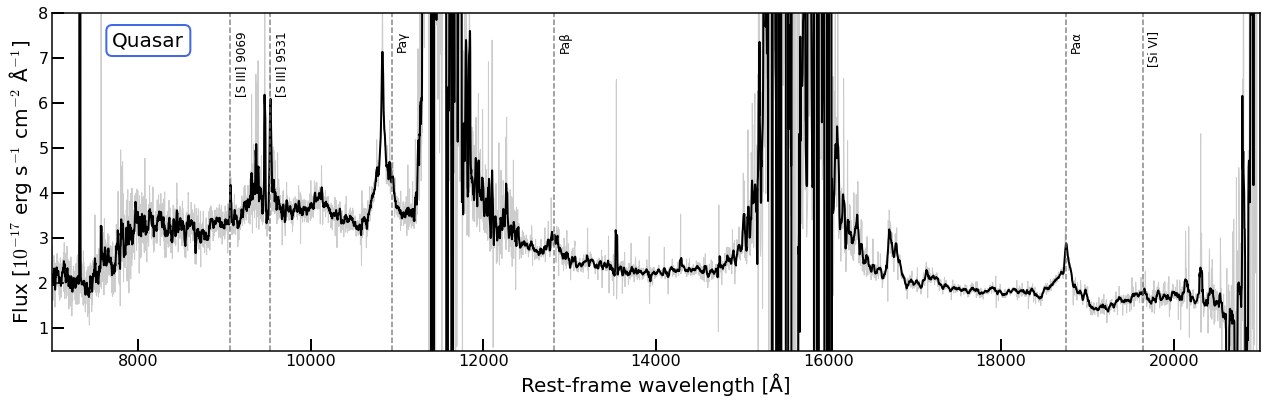

In [18]:
## Plotting a smoothed spectrum for better visualization

# Assign columns
wavelength = qso_data[0]  # Wavelength [A]
flux = qso_data[1]  # Flux [1e-17 * erg/s/cm²/Å]
uncertainty = qso_data[2]  

# Smoothed flux
smoothed_flux = boxcar_smooth(flux, window_size=10)

# Change to rest wavelength
z = 0.199
wavelength_rest = wavelength / (1 + z)

# Create figure
fig, ax = plt.subplots(figsize=(18, 6), tight_layout=True, sharey=True,)  

# Plot flux
ax.plot(wavelength_rest, flux, color="gray", linewidth=1, alpha=0.4, label='Flux')
ax.plot(wavelength_rest, smoothed_flux, color="black", linewidth=2, label='Smoothed Flux')

# Labels 
ax.set_xlabel(r"Rest-frame wavelength [Å]")  
ax.set_ylabel(r"Flux [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]")

# Limit the axis
ax.set_xlim([7000, 21000])
ax.set_ylim([0.5,8])

# Add emission lines (add after defining the axes limits)
plot_nir_lines(z=0.199, rest_frame=True)

# Add legend without a bounding box
#ax.legend(frameon=False, loc='upper right' )


ax.text(s="Quasar", x=ax.get_xlim()[0] * 1.10, y=ax.get_ylim()[1] * 0.95,  
            bbox=dict(boxstyle="round", fc='white', ec='royalblue', lw=2),      
            fontsize=20, va='top')

# Show plot
plt.show()

#fig.savefig("../overleaf/fire_qso_spectrum.png", transparent=False, facecolor='white')

## Companion spectrum

file = 'FIRE_DQSO_B.txt'

In [16]:
# Load the data using pandas (adjust delimiter if necessary)
filename = "FIRE_DQSO_B.txt"  
df_b = pd.read_csv(filename, sep='\s+', header=None)
companion_data = df_b.transpose()
companion_data

,0,1,2,3,4,5
0,8224.977943,5.164510,2.055610,-0.988962,0.393633,-0.191492
1,8226.348773,-0.387552,0.413421,-0.364985,0.389347,0.941768
2,8227.719831,0.715974,0.424389,0.629889,0.373363,0.879766
3,8229.091117,-0.014075,0.398346,-0.011312,0.320157,0.803716
4,8230.462633,0.828043,0.414787,0.602529,0.301821,0.727654
...,...,...,...,...,...,...
6717,25193.407008,-49.621657,25.529188,-7.621745,3.921210,0.153597
6718,25197.605910,-34.154507,51.958417,-2.950209,4.488080,0.086378
6719,25201.805511,-31.236508,33.266113,4.747951,5.056451,-0.152000
6720,25206.005811,-25.957420,15.761373,10.382494,6.304261,-0.399982


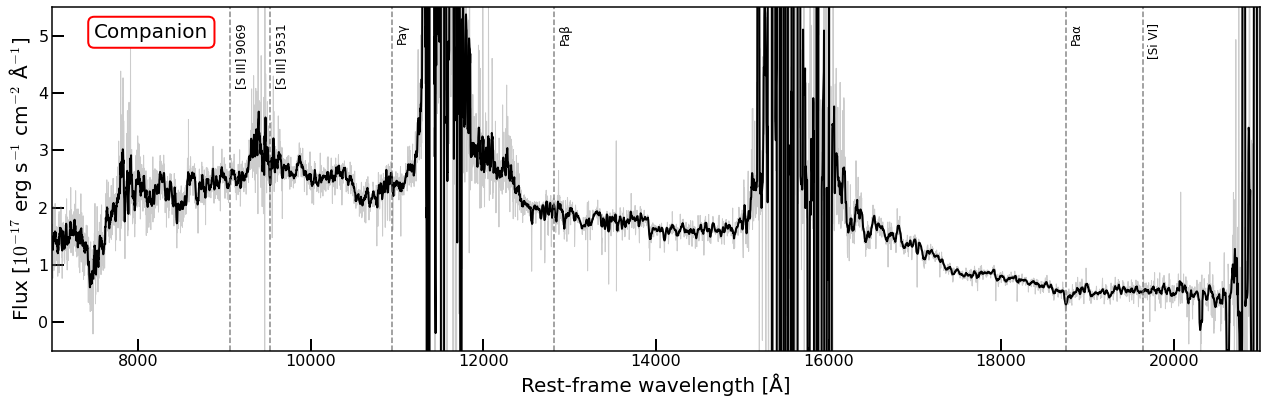

In [19]:
# Assign columns
wavelength = companion_data[0]  # Wavelength [A]
flux = companion_data[1]  # Flux [1e-17 * erg/s/cm²/Å]
uncertainty = companion_data[2]  

# Smoothed flux
smoothed_flux = boxcar_smooth(flux, window_size=10)

# Change to rest wavelength
z = 0.199
wavelength_rest = wavelength / (1 + z)

# Create figure
fig, ax = plt.subplots(figsize=(18, 6), tight_layout=True)  

# Plot flux
ax.plot(wavelength_rest, flux, color="gray", linewidth=1, alpha=0.4, label='Flux')
ax.plot(wavelength_rest, smoothed_flux, color="black", linewidth=2, label='Smoothed Flux')

# Labels 
ax.set_xlabel(r"Rest-frame wavelength [Å]")  
ax.set_ylabel(r"Flux [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]")

# Limit the axis
ax.set_xlim([7000, 21000])
ax.set_ylim([-0.5,5.5])

# Add emission lines (add after defining the axes limits)
plot_nir_lines(z=0.199, rest_frame=True)

# Add legend without a bounding box
#ax.legend(frameon=False, loc='upper right' )

ax.text(s="Companion", x=ax.get_xlim()[0] * 1.07, y=ax.get_ylim()[1] * 0.95,  
            bbox=dict(boxstyle="round", fc='white', ec='red', lw=2),      
            fontsize=20, va='top')

# Show plot
plt.show()

#fig.savefig("../overleaf/fire_companion_spectrum.png", transparent=False, facecolor='white')